In [ ]:
api_key = 'b1cc802568994a43adc5eedce49d3f17'

#Question Answering on Virat Kohli News Using Transformers

![link text](https://wallpapercat.com/w/full/e/9/1/150106-2880x1620-desktop-hd-virat-kohli-background-photo.jpg)

In [ ]:
!pip install newsapi-python


In [ ]:
from newsapi import NewsApiClient
import pandas as pd
from datetime import datetime, timedelta

# Initialize the NewsAPI client
newsapi = NewsApiClient(api_key=api_key)

# Define the date range for the past 30 days
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

# Fetch articles
all_articles = newsapi.get_everything(
    q='Virat Kohli',
    from_param=start_date.strftime('%Y-%m-%d'),
    to=end_date.strftime('%Y-%m-%d'),
    language='en',
    sort_by='relevancy',
    page_size=100
)

# Convert articles to DataFrame
articles_df = pd.DataFrame(all_articles['articles'])


In [ ]:
articles_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'CNA'}",None,Kohli highlights importance of partnerships af...,BENGALURU :Twenty20 cricket is fast becoming a...,https://www.channelnewsasia.com/sport/kohli-hi...,https://dam.mediacorp.sg/image/upload/s--Q9sqF...,2025-04-28T07:28:09Z,BENGALURU :Twenty20 cricket is fast becoming a...
1,"{'id': None, 'name': 'Forbes'}","Tristan Lavalette, Contributor, \n Tristan Lav...",Meet The 14-Year-Old Cricketer Setting Records...,The cricket world was left stunned after 14-ye...,https://www.forbes.com/sites/tristanlavalette/...,https://imageio.forbes.com/specials-images/ima...,2025-05-01T13:29:41Z,Vaibhav Suryavanshi smashed a century in the I...
2,"{'id': None, 'name': 'Yahoo Entertainment'}",None,India great Virat Kohli set to call time on Te...,Virat Kohli is set to deliver another blow to ...,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-05-10T09:30:11Z,"If you click 'Accept all', we and our partners..."
3,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Virat Kohli and Phil Salt fashion dominant win...,Virat Kohli and Phil Salt struck attacking hal...,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-13T13:45:05Z,"If you click 'Accept all', we and our partners..."
4,"{'id': None, 'name': 'CNA'}",None,"Iyer and Kishan win back India contracts, Pant...",NEW DELHI :Shreyas Iyer and Ishan Kishan have ...,https://www.channelnewsasia.com/sport/iyer-and...,https://dam.mediacorp.sg/image/upload/s--WNkbq...,2025-04-21T10:00:53Z,NEW DELHI :Shreyas Iyer and Ishan Kishan have ...
...,...,...,...,...,...,...,...,...
91,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,Watch: Virat Kohli Recreates KL Rahul's Kantar...,Virat Kohli responded to KL Rahul's Kantara ce...,https://sports.ndtv.com/ipl-2025/virat-kohli-r...,https://c.ndtvimg.com/2025-04/q0b0h4o8_virat-k...,2025-04-28T01:54:13Z,Virat Kohli responded to KL Rahul's Kantara ce...
92,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,"Fans Angry As Kohli, Sudharsan Snubbed From IP...",Sanjay Manjrekar has given fans another reason...,https://sports.ndtv.com/ipl-2025/fans-angry-as...,https://c.ndtvimg.com/2025-04/k5ghuki4_kohli-a...,2025-04-27T02:23:49Z,Often known to trigger debates on social media...
93,"{'id': None, 'name': 'NDTV News'}",Press Trust of India,"Rohit, Kohli Playing 2027 WC ""Will Depend On.....","Rohit Sharma and Virat Kohli ""should be a part...",https://sports.ndtv.com/cricket/rohit-sharma-v...,https://c.ndtvimg.com/2025-03/l0bmrfkg_kohli-r...,2025-05-08T02:04:18Z,"Rohit Sharma and Virat Kohli ""should be a part..."
94,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,Virat-Anushka's Reason Behind Moving Out Of In...,Bollywood actress Madhuri Dixit's husband - Dr...,https://sports.ndtv.com/cricket/virat-kohli-an...,https://c.ndtvimg.com/2024-02/aurn0uj_virat-an...,2025-04-26T12:46:32Z,Bollywood actress Madhuri Dixit's husband - Dr...


In [ ]:
import spacy #spacy is used for NLP tasks like tokenization and lemmatization.
import re

# Load the English NLP model from spaCy
nlp = spacy.load('en_core_web_sm')

# Remove duplicate articles based on title
articles_df.drop_duplicates(subset='title', inplace=True)

# Drop rows with missing content
articles_df.dropna(subset=['content'], inplace=True)

# Function for text preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize and lemmatize
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Apply preprocessing to the content
articles_df['processed_content'] = articles_df['content'].apply(preprocess_text)


In [ ]:
articles_df

,source,author,title,description,url,urlToImage,publishedAt,content,processed_content
0,"{'id': None, 'name': 'CNA'}",None,Kohli highlights importance of partnerships af...,BENGALURU :Twenty20 cricket is fast becoming a...,https://www.channelnewsasia.com/sport/kohli-hi...,https://dam.mediacorp.sg/image/upload/s--Q9sqF...,2025-04-28T07:28:09Z,BENGALURU :Twenty20 cricket is fast becoming a...,bengaluru twenty20 cricket fast stage explosiv...
1,"{'id': None, 'name': 'Forbes'}","Tristan Lavalette, Contributor, \n Tristan Lav...",Meet The 14-Year-Old Cricketer Setting Records...,The cricket world was left stunned after 14-ye...,https://www.forbes.com/sites/tristanlavalette/...,https://imageio.forbes.com/specials-images/ima...,2025-05-01T13:29:41Z,Vaibhav Suryavanshi smashed a century in the I...,vaibhav suryavanshi smash century ipl photo sa...
2,"{'id': None, 'name': 'Yahoo Entertainment'}",None,India great Virat Kohli set to call time on Te...,Virat Kohli is set to deliver another blow to ...,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-05-10T09:30:11Z,"If you click 'Accept all', we and our partners...",click accept partner include 241 iab transpare...
3,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Virat Kohli and Phil Salt fashion dominant win...,Virat Kohli and Phil Salt struck attacking hal...,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-13T13:45:05Z,"If you click 'Accept all', we and our partners...",click accept partner include 239 iab transpare...
4,"{'id': None, 'name': 'CNA'}",None,"Iyer and Kishan win back India contracts, Pant...",NEW DELHI :Shreyas Iyer and Ishan Kishan have ...,https://www.channelnewsasia.com/sport/iyer-and...,https://dam.mediacorp.sg/image/upload/s--WNkbq...,2025-04-21T10:00:53Z,NEW DELHI :Shreyas Iyer and Ishan Kishan have ...,new delhi shreyas iyer ishan kishan win centra...
...,...,...,...,...,...,...,...,...,...
91,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,Watch: Virat Kohli Recreates KL Rahul's Kantar...,Virat Kohli responded to KL Rahul's Kantara ce...,https://sports.ndtv.com/ipl-2025/virat-kohli-r...,https://c.ndtvimg.com/2025-04/q0b0h4o8_virat-k...,2025-04-28T01:54:13Z,Virat Kohli responded to KL Rahul's Kantara ce...,virat kohli respond kl rahuls kantara celebrat...
92,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,"Fans Angry As Kohli, Sudharsan Snubbed From IP...",Sanjay Manjrekar has given fans another reason...,https://sports.ndtv.com/ipl-2025/fans-angry-as...,https://c.ndtvimg.com/2025-04/k5ghuki4_kohli-a...,2025-04-27T02:23:49Z,Often known to trigger debates on social media...,know trigger debate social medium comment comm...
93,"{'id': None, 'name': 'NDTV News'}",Press Trust of India,"Rohit, Kohli Playing 2027 WC ""Will Depend On.....","Rohit Sharma and Virat Kohli ""should be a part...",https://sports.ndtv.com/cricket/rohit-sharma-v...,https://c.ndtvimg.com/2025-03/l0bmrfkg_kohli-r...,2025-05-08T02:04:18Z,"Rohit Sharma and Virat Kohli ""should be a part...",rohit sharma virat kohli indian team till perf...
94,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,Virat-Anushka's Reason Behind Moving Out Of In...,Bollywood actress Madhuri Dixit's husband - Dr...,https://sports.ndtv.com/cricket/virat-kohli-an...,https://c.ndtvimg.com/2024-02/aurn0uj_virat-an...,2025-04-26T12:46:32Z,Bollywood actress Madhuri Dixit's husband - Dr...,bollywood actress madhuri dixits husband dr ...


In [ ]:
!pip install transformers torch


In [ ]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Analyze sentiment
articles_df['sentiment'] = articles_df['processed_content'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
articles_df

,source,author,title,description,url,urlToImage,publishedAt,content,processed_content,sentiment
0,"{'id': None, 'name': 'CNA'}",None,Kohli highlights importance of partnerships af...,BENGALURU :Twenty20 cricket is fast becoming a...,https://www.channelnewsasia.com/sport/kohli-hi...,https://dam.mediacorp.sg/image/upload/s--Q9sqF...,2025-04-28T07:28:09Z,BENGALURU :Twenty20 cricket is fast becoming a...,bengaluru twenty20 cricket fast stage explosiv...,POSITIVE
1,"{'id': None, 'name': 'Forbes'}","Tristan Lavalette, Contributor, \n Tristan Lav...",Meet The 14-Year-Old Cricketer Setting Records...,The cricket world was left stunned after 14-ye...,https://www.forbes.com/sites/tristanlavalette/...,https://imageio.forbes.com/specials-images/ima...,2025-05-01T13:29:41Z,Vaibhav Suryavanshi smashed a century in the I...,vaibhav suryavanshi smash century ipl photo sa...,NEGATIVE
2,"{'id': None, 'name': 'Yahoo Entertainment'}",None,India great Virat Kohli set to call time on Te...,Virat Kohli is set to deliver another blow to ...,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-05-10T09:30:11Z,"If you click 'Accept all', we and our partners...",click accept partner include 241 iab transpare...,NEGATIVE
3,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Virat Kohli and Phil Salt fashion dominant win...,Virat Kohli and Phil Salt struck attacking hal...,https://consent.yahoo.com/v2/collectConsent?se...,None,2025-04-13T13:45:05Z,"If you click 'Accept all', we and our partners...",click accept partner include 239 iab transpare...,NEGATIVE
4,"{'id': None, 'name': 'CNA'}",None,"Iyer and Kishan win back India contracts, Pant...",NEW DELHI :Shreyas Iyer and Ishan Kishan have ...,https://www.channelnewsasia.com/sport/iyer-and...,https://dam.mediacorp.sg/image/upload/s--WNkbq...,2025-04-21T10:00:53Z,NEW DELHI :Shreyas Iyer and Ishan Kishan have ...,new delhi shreyas iyer ishan kishan win centra...,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...
91,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,Watch: Virat Kohli Recreates KL Rahul's Kantar...,Virat Kohli responded to KL Rahul's Kantara ce...,https://sports.ndtv.com/ipl-2025/virat-kohli-r...,https://c.ndtvimg.com/2025-04/q0b0h4o8_virat-k...,2025-04-28T01:54:13Z,Virat Kohli responded to KL Rahul's Kantara ce...,virat kohli respond kl rahuls kantara celebrat...,POSITIVE
92,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,"Fans Angry As Kohli, Sudharsan Snubbed From IP...",Sanjay Manjrekar has given fans another reason...,https://sports.ndtv.com/ipl-2025/fans-angry-as...,https://c.ndtvimg.com/2025-04/k5ghuki4_kohli-a...,2025-04-27T02:23:49Z,Often known to trigger debates on social media...,know trigger debate social medium comment comm...,NEGATIVE
93,"{'id': None, 'name': 'NDTV News'}",Press Trust of India,"Rohit, Kohli Playing 2027 WC ""Will Depend On.....","Rohit Sharma and Virat Kohli ""should be a part...",https://sports.ndtv.com/cricket/rohit-sharma-v...,https://c.ndtvimg.com/2025-03/l0bmrfkg_kohli-r...,2025-05-08T02:04:18Z,"Rohit Sharma and Virat Kohli ""should be a part...",rohit sharma virat kohli indian team till perf...,POSITIVE
94,"{'id': None, 'name': 'NDTV News'}",NDTV Sports Desk,Virat-Anushka's Reason Behind Moving Out Of In...,Bollywood actress Madhuri Dixit's husband - Dr...,https://sports.ndtv.com/cricket/virat-kohli-an...,https://c.ndtvimg.com/2024-02/aurn0uj_virat-an...,2025-04-26T12:46:32Z,Bollywood actress Madhuri Dixit's husband - Dr...,bollywood actress madhuri dixits husband dr ...,POSITIVE


<Figure size 1200x600 with 0 Axes>

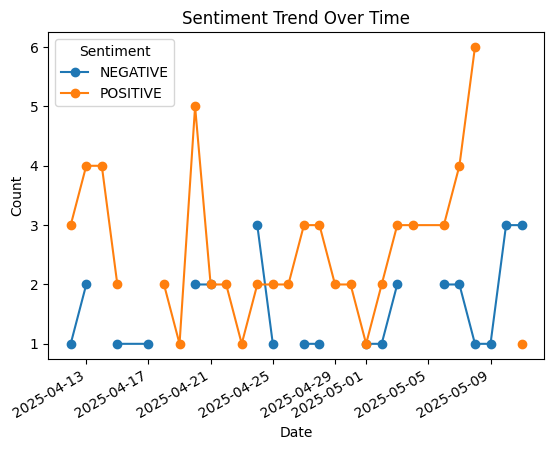

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert publishedAt to datetime
articles_df['publishedAt'] = pd.to_datetime(articles_df['publishedAt'])

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
articles_df.set_index('publishedAt', inplace=True)
articles_df.resample('D').sentiment.value_counts().unstack().plot(kind='line', marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
from transformers import pipeline

# Initialize the question-answering pipeline
qa_pipeline = pipeline('question-answering')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
# Example question
question = "is virat kohli retiring from cricket?"

# Concatenate all articles into a single context
context = ' '.join(articles_df['processed_content'].tolist())

# Get the answer
answer = qa_pipeline(question=question, context=context)
print(answer['answer'])

retirement
